# Tips-and-tricks: Mostly maps

### Basic preamble

In [1]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy import stats

from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from datetime import datetime
months =[datetime(2019, imon, 1) for imon in np.arange(1, 12 + 1)]
month_str = [date_obj.strftime('%b') for date_obj in months]
m_str = [w[0] for w in month_str];

# Get color order
prop_cycle = plt.rcParams['axes.prop_cycle']

colors = prop_cycle.by_key()['color']

### Background NOT tranparent

`fig.set_facecolor("white")`

## Centered on the Pacific with coastlines (`xarray` + `cartopy`)

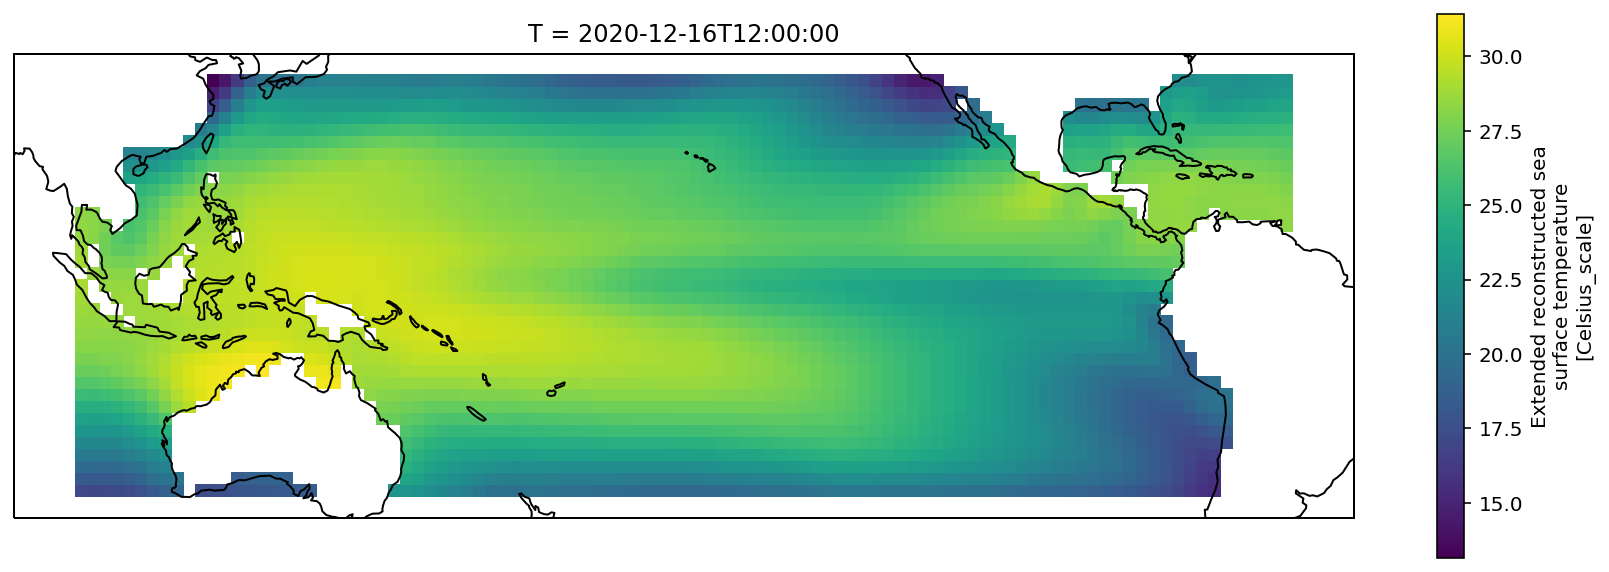

In [2]:
ersst5_url="http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/.version5/.sst/Y/-35/35/RANGEEDGES/X/100/300/RANGEEDGES/zlev/removeGRID/T/last/VALUE/T/(days%20since%201960-01-01)streamgridunitconvert/dods"
ersst5_ds = xr.open_dataset(ersst5_url)
sst = ersst5_ds.sst.isel(T = 0)

proj_map = ccrs.PlateCarree(central_longitude = 180)
proj_dta = ccrs.PlateCarree()

fig = plt.figure(figsize = (15, 5))
ax = plt.subplot(projection = proj_map)

sst.plot(ax = ax, transform = proj_dta)
ax.coastlines();

## Centered on the Pacific with coastlines and hatching (`xarray` + `cartopy`)

Use numpy arrays for the hatching masks.

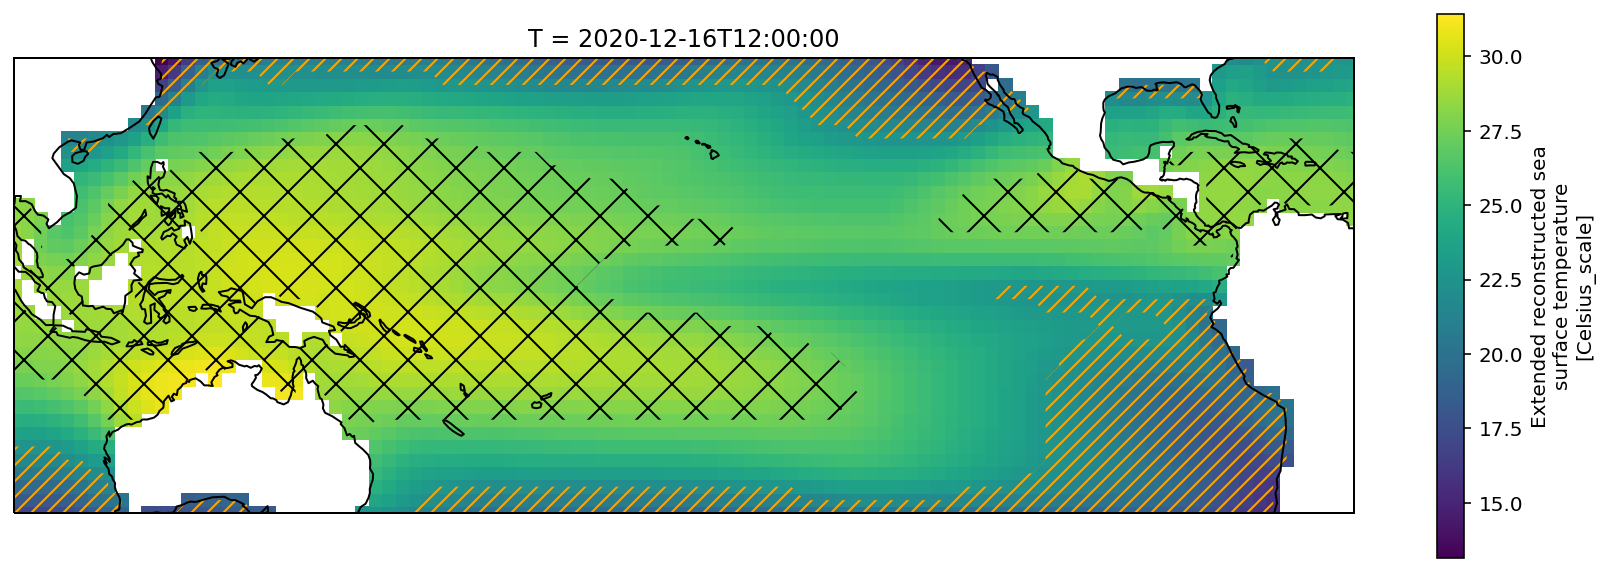

In [23]:
# same as above with hatching
fig = plt.figure(figsize = (15, 5))
ax = plt.subplot(projection = proj_map)

sst.plot(ax = ax, transform = proj_dta)
ax.coastlines();

#warm
warm = np.zeros(sst.shape) ; 
warm[(np.abs(sst) < 27) | np.isnan(sst)] = np.nan

#cold
cold = np.zeros(sst.shape) ; 
cold[(np.abs(sst) > 23) | np.isnan(sst)] = np.nan

ax.contourf(sst.X, sst.Y, warm, hatches = ['x'], colors = 'none', transform = proj_dta);
cs = ax.contourf(sst.X, sst.Y, cold, hatches = ['/'], colors = 'none', transform = proj_dta);

cs.collections[0].set_edgecolor('orange')
# remove bounding conotur?
cs.collections[0].set_linewidth(0.)

Use xarray arrays for the hatching masks.

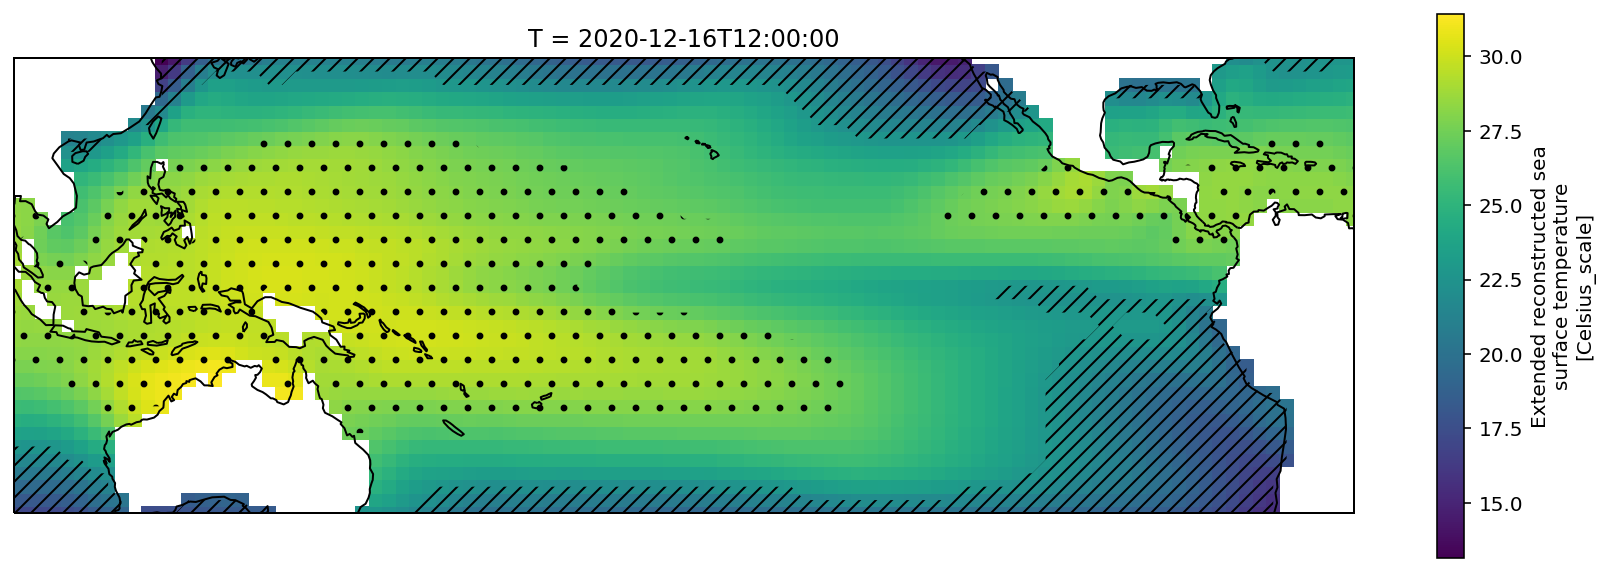

In [25]:
# same as above with xarray instead of numpy arrays
proj_map = ccrs.PlateCarree(central_longitude = 180)
proj_dta = ccrs.PlateCarree()

fig = plt.figure(figsize = (15, 5))
ax = plt.subplot(projection = proj_map)

sst.plot(ax = ax, transform = proj_dta)
ax.coastlines();

#warm
warm = sst.copy(data = np.zeros(sst.shape))
warm = warm.where(sst > 27, np.nan)

#cold
cold = sst.copy(data = np.zeros(sst.shape))
cold = cold.where(sst < 23, np.nan)

warm.plot.contourf(hatches = ['.'], colors = 'none', add_colorbar = False, transform = proj_dta);
cs = cold.plot.contourf(hatches = ['//'], colors = 'none', add_colorbar = False, transform = proj_dta);

#Color of the hatching?

## Read elevation from the data libaray and plot it on a map

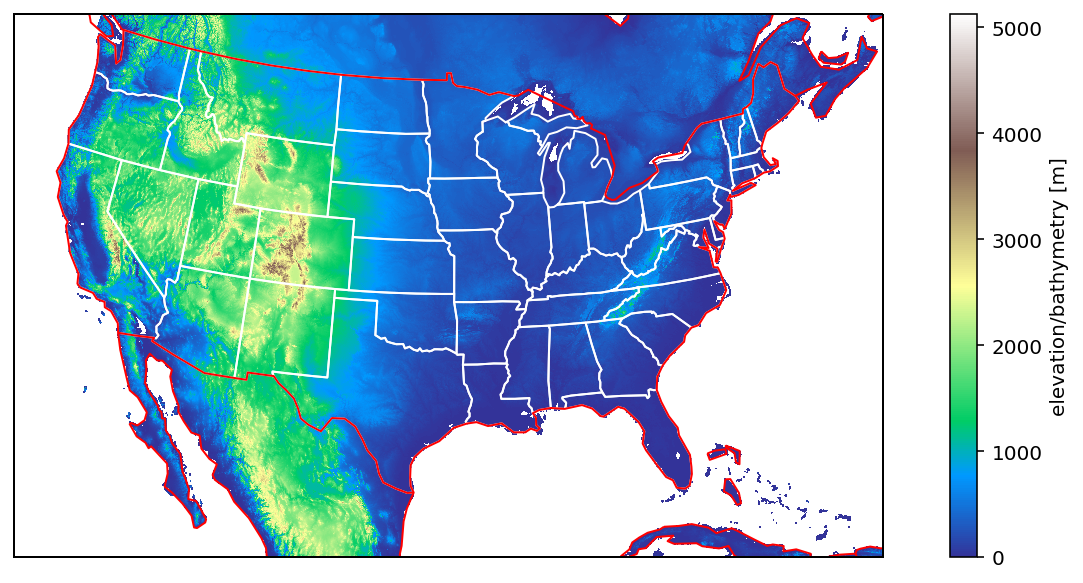

In [40]:
proj_map = ccrs.LambertConformal(central_longitude = -95, central_latitude = 45)
proj_dta = ccrs.PlateCarree()  # the data's projection
extent = [-120, -70, 20, 50.5]

z_url = 'https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NGDC/.ETOPO2v2/.z/'
region = 'X/-125./-55/RANGEEDGES/Y/15/60/RANGEEDGES/0/masklt/'
bath_url = z_url + region + 'dods'
bath_ds = xr.open_dataset(bath_url)

fig = plt.figure(figsize = (12, 5))
ax = plt.subplot(projection = proj_map)

elevation = bath_ds.z

elevation.plot(ax = ax, cmap = 'terrain', transform = proj_dta)
ax.add_feature(cfeature.STATES, edgecolor = 'white')
ax.add_feature(cfeature.BORDERS, edgecolor = 'red')
ax.coastlines(color = 'red');
ax.set_extent(extent)

## Read GFSv12 SWE and plot it with a wacky colormap

In [43]:
swe_ds = xr.open_dataset('http://iridl.ldeo.columbia.edu/SOURCES/.Models/.SubX/.EMC/.GEFSv12/.forecast/swe/[M]/average/[L]/sum/S/last/VALUE/dods')
swe_ds

<xarray.Dataset>
Dimensions:  (S: 1, X: 360, Y: 181)
Coordinates:
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * Y        (Y) float32 90.0 89.0 88.0 87.0 86.0 ... -87.0 -88.0 -89.0 -90.0
  * S        (S) datetime64[ns] 2020-12-30
Data variables:
    swe      (S, Y, X) float64 ...
Attributes:
    Conventions:  IRIDL

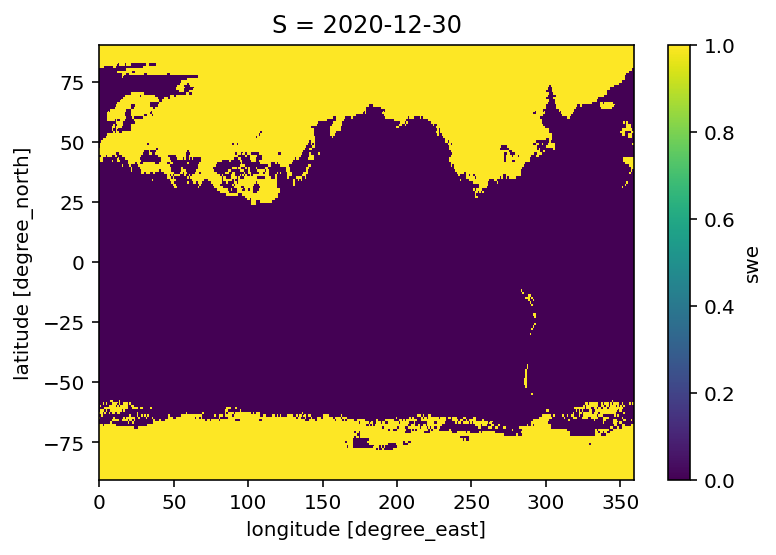

In [45]:
swe = swe_ds.swe
(swe > 10).plot();

In [46]:
import matplotlib.colors as mcolors

nws_precip_colors = [
    "#fdfdfd",  # 0.01 - 0.10 inches
    "#019ff4",  # 0.10 - 0.25 inches
    "#0300f4",  # 0.25 - 0.50 inches
    "#02fd02",  # 0.50 - 0.75 inches
    "#01c501",  # 0.75 - 1.00 inches
    "#008e00",  # 1.00 - 1.50 inches
    "#fdf802",  # 1.50 - 2.00 inches
    "#e5bc00",  # 2.00 - 2.50 inches
    "#fd9500",  # 2.50 - 3.00 inches
    "#fd0000",  # 3.00 - 4.00 inches
    "#d40000",  # 4.00 - 5.00 inches
    "#bc0000",  # 5.00 - 6.00 inches
    "#f800fd",  # 6.00 - 8.00 inches
    "#9854c6"  # 8.00 - 10.00 inches
]
import matplotlib as mp
cmap = mp.colors.ListedColormap(nws_precip_colors)

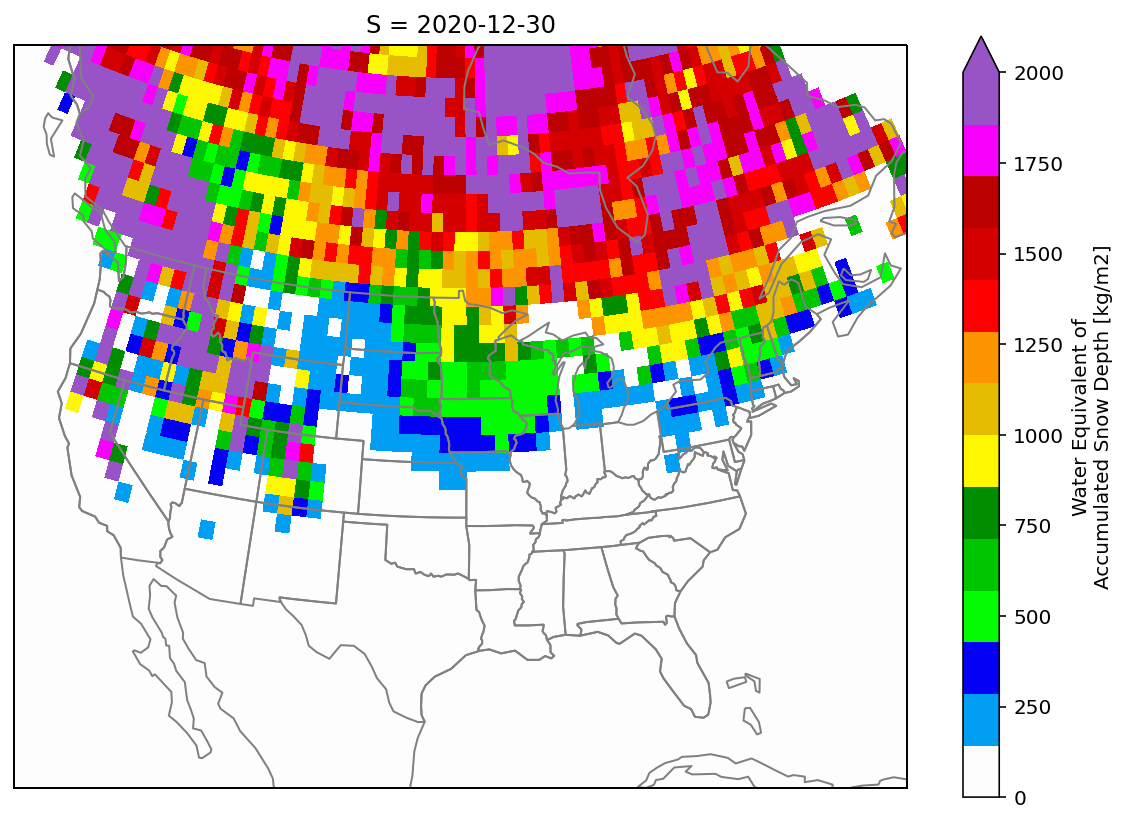

In [47]:
proj_map = ccrs.LambertConformal(central_longitude = -95, central_latitude = 45)
proj_dta = ccrs.PlateCarree()  # the data's projection

fig = plt.figure(figsize = (10, 7))
ax = plt.subplot(projection = proj_map)
extent = [-120, -70, 20, 60.5]

swe.isel(S = 0).plot(transform = proj_dta, ax = ax, cmap = cmap, vmax = 2000)
ax.coastlines(color = 'gray');
ax.add_feature(cfeature.STATES, edgecolor = 'gray')
ax.set_extent(extent)

## `xarray` faceted plots: plain

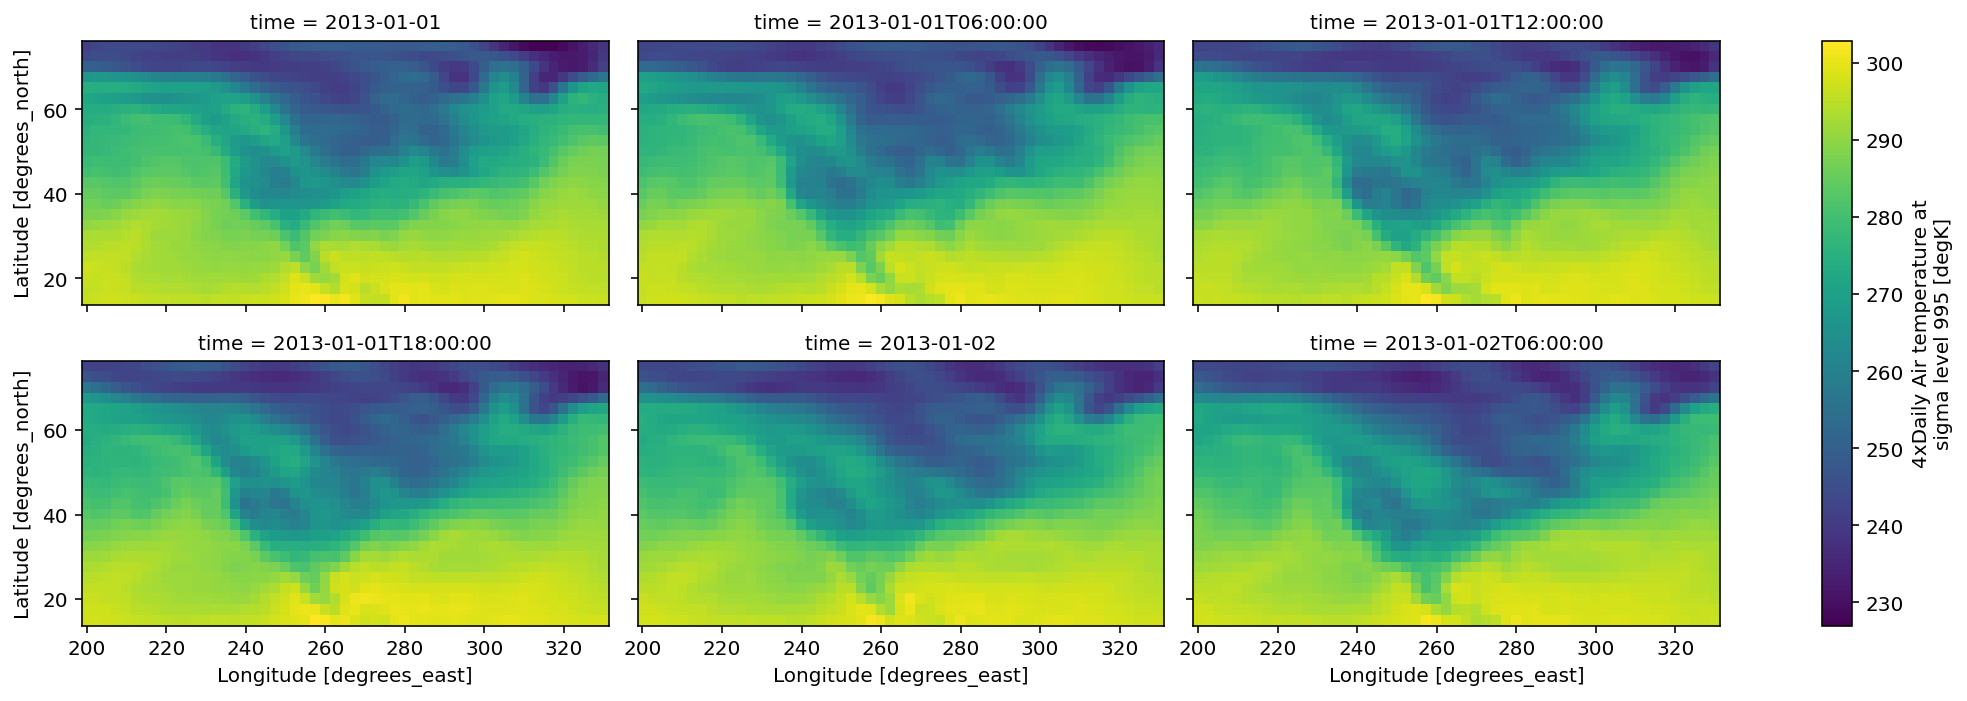

In [48]:
ds = xr.tutorial.open_dataset("air_temperature")
da = ds.air.isel(time = slice(None, 6))
# bare bones, no projection but ticks
da.plot(col = 'time', col_wrap = 3, figsize = (15, 5));

## `xarray` faceted plots: coastlines

/Users/tippett/miniconda3/envs/pangeo/lib/python3.6/site-packages/xarray/plot/facetgrid.py:373: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout()


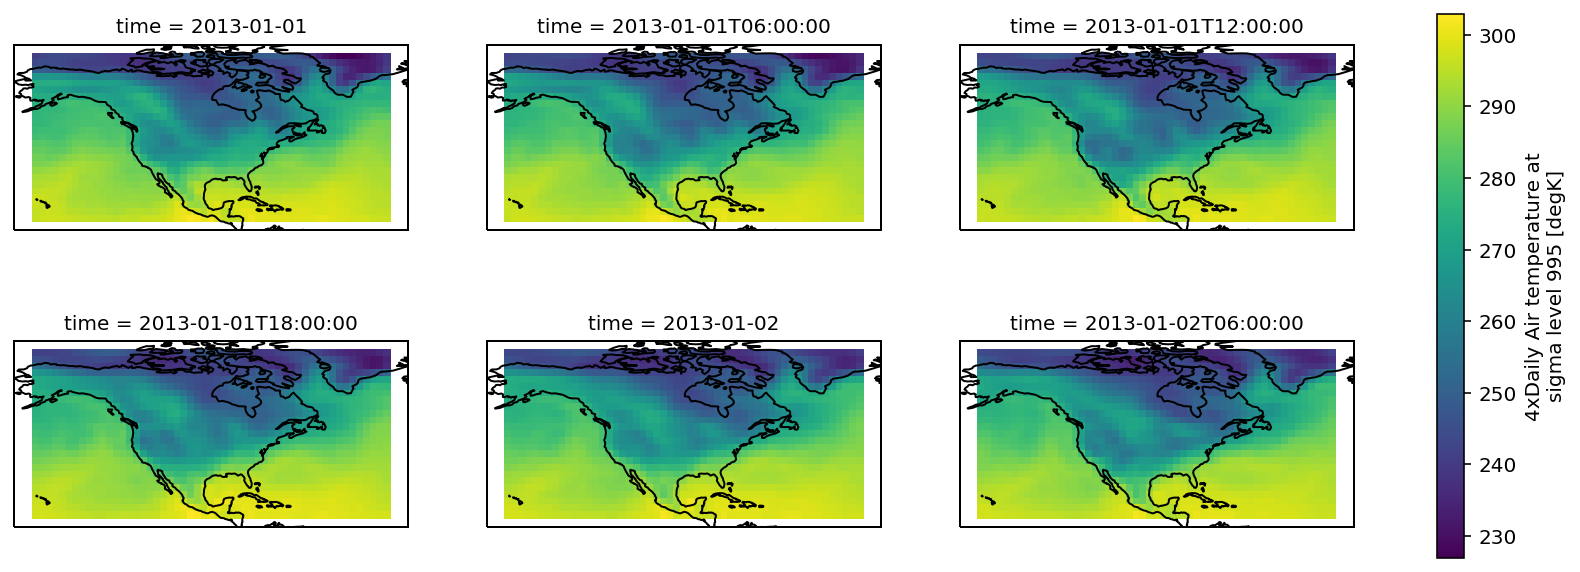

In [49]:
# bare bones with projection, coastlines, no ticks
proj = ccrs.PlateCarree()
g = da.plot(transform=proj, col = 'time', col_wrap = 3, figsize=(15, 5), subplot_kws = {'projection': proj});
for ii, ax in enumerate(g.axes.flat):
    ax.coastlines()

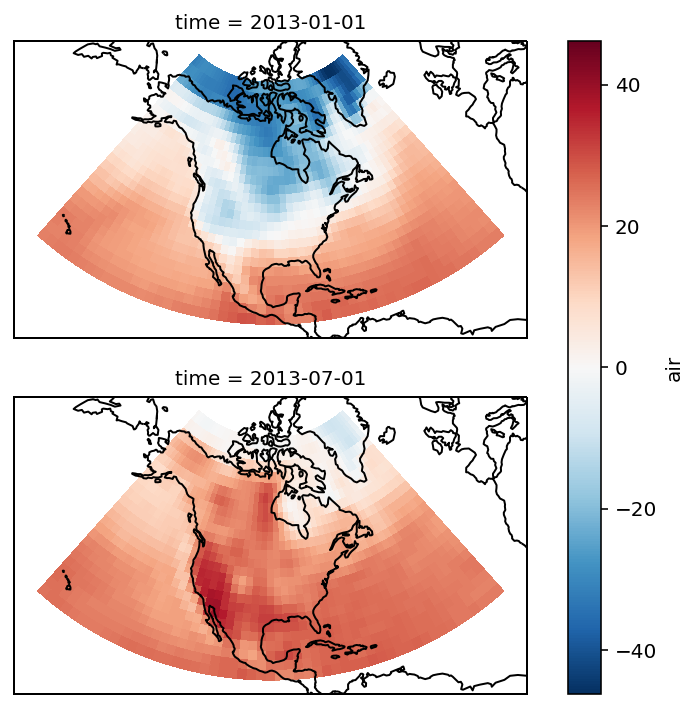

In [141]:
air = ds.air.isel(time=[0, 724]) - 273.15

# This is the map projection we want to plot *onto*
proj_map = ccrs.LambertConformal(central_longitude=-95, central_latitude=45)
proj_dta = ccrs.PlateCarree()  # the data's projection
p = air.plot(transform = proj_dta,  # the data's projection
             col='time', col_wrap= 1,  # multiplot settings
             #figsize=(8, 8),
             aspect=ds.dims['lon'] / ds.dims['lat'],  # for a sensible figsize
             subplot_kws={'projection': proj_map})  # the plot's projection
for ii, ax in enumerate(p.axes.flat):
    ax.coastlines()

/Users/tippett/miniconda3/envs/pangeo/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/tippett/miniconda3/envs/pangeo/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1390: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)
/Users/tippett/miniconda3/envs/pangeo/lib/python3.6/site-packages/xarray/plot/facetgrid.py:373: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


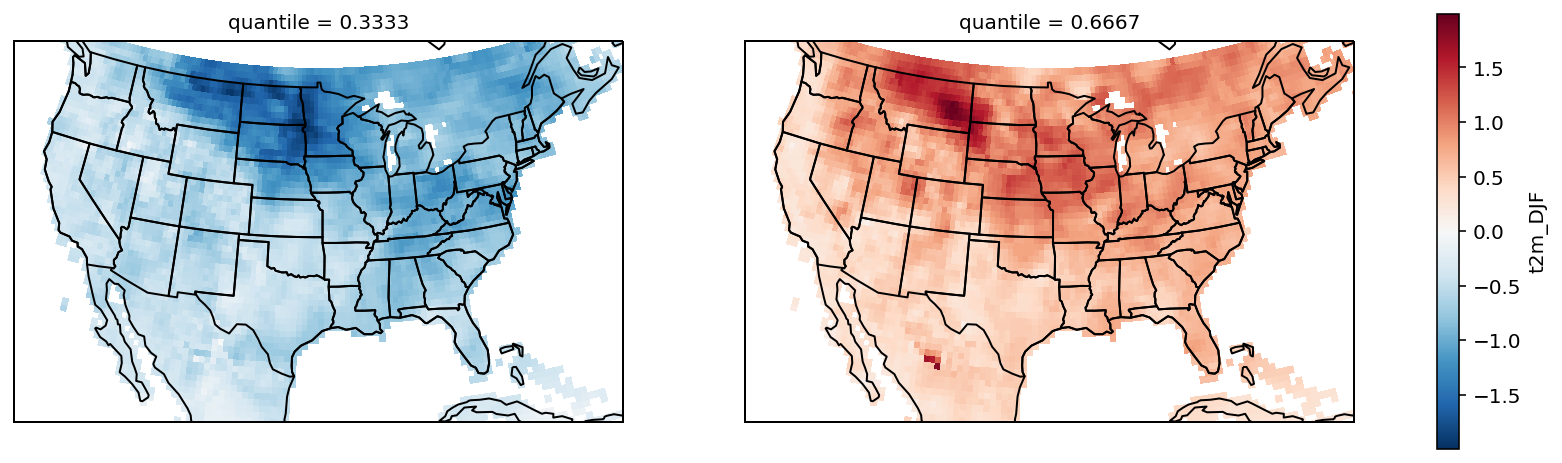

In [571]:
# 2-meter temperature
t2m_DJF_url = 'http://iridl.ldeo.columbia.edu/home/.tippett/.scratch/.APMA4990/.t2m_DJF/dods'
t2m_DJF_ds = xr.open_dataset(t2m_DJF_url)

t2m = t2m_DJF_ds.t2m_DJF - t2m_DJF_ds.t2m_DJF.mean('T')
t2m_terciles = t2m.quantile([1./3., 2./3.], dim='T')

proj_map = ccrs.LambertConformal(central_longitude=-95, central_latitude=45)
proj_dta = ccrs.PlateCarree()  # the data's projection

extent = [-120, -70, 20, 50.5]

g = t2m_terciles.plot(x = 'X', y = 'Y', col = 'quantile', figsize=(15,4), 
                      transform = proj_dta, subplot_kws={'projection':proj_map})
for ii, ax in enumerate(g.axes.flat):
    ax.add_feature(cfeature.STATES)
    ax.coastlines()
    ax.set_extent(extent)

In [52]:
region = 'X/240/310/RANGE/Y/-30/30/RANGE/'
ersstv5_url = 'https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/.version5/.sst/'
climatology = 'T/(Jan%201981)/(Dec%202010)/RANGE/yearly-climatology/'
sst_climo_url = ersstv5_url + climatology + region + 'zlev/removeGRID/T/(days%20since%201960-01-01)streamgridunitconvert/dods'
sst_climo_ds = xr.open_dataset(sst_climo_url)

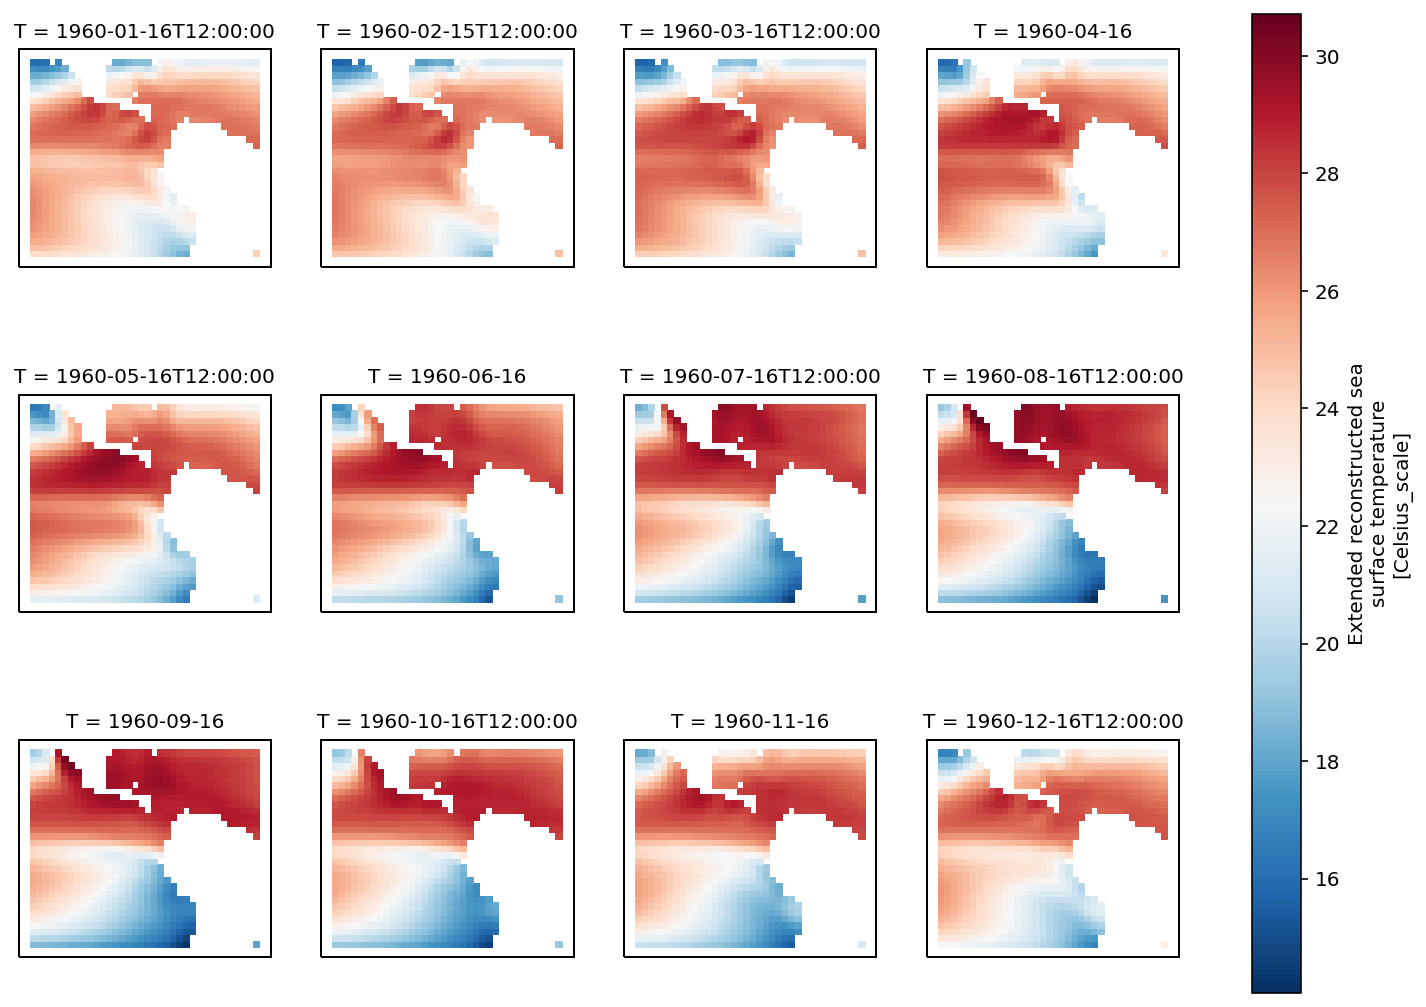

In [55]:
sst_climo_ds.sst.plot(x='X', y='Y', col='T', col_wrap=4, cmap='RdBu_r', 
                          subplot_kws={'projection': ccrs.PlateCarree()}, infer_intervals=True);

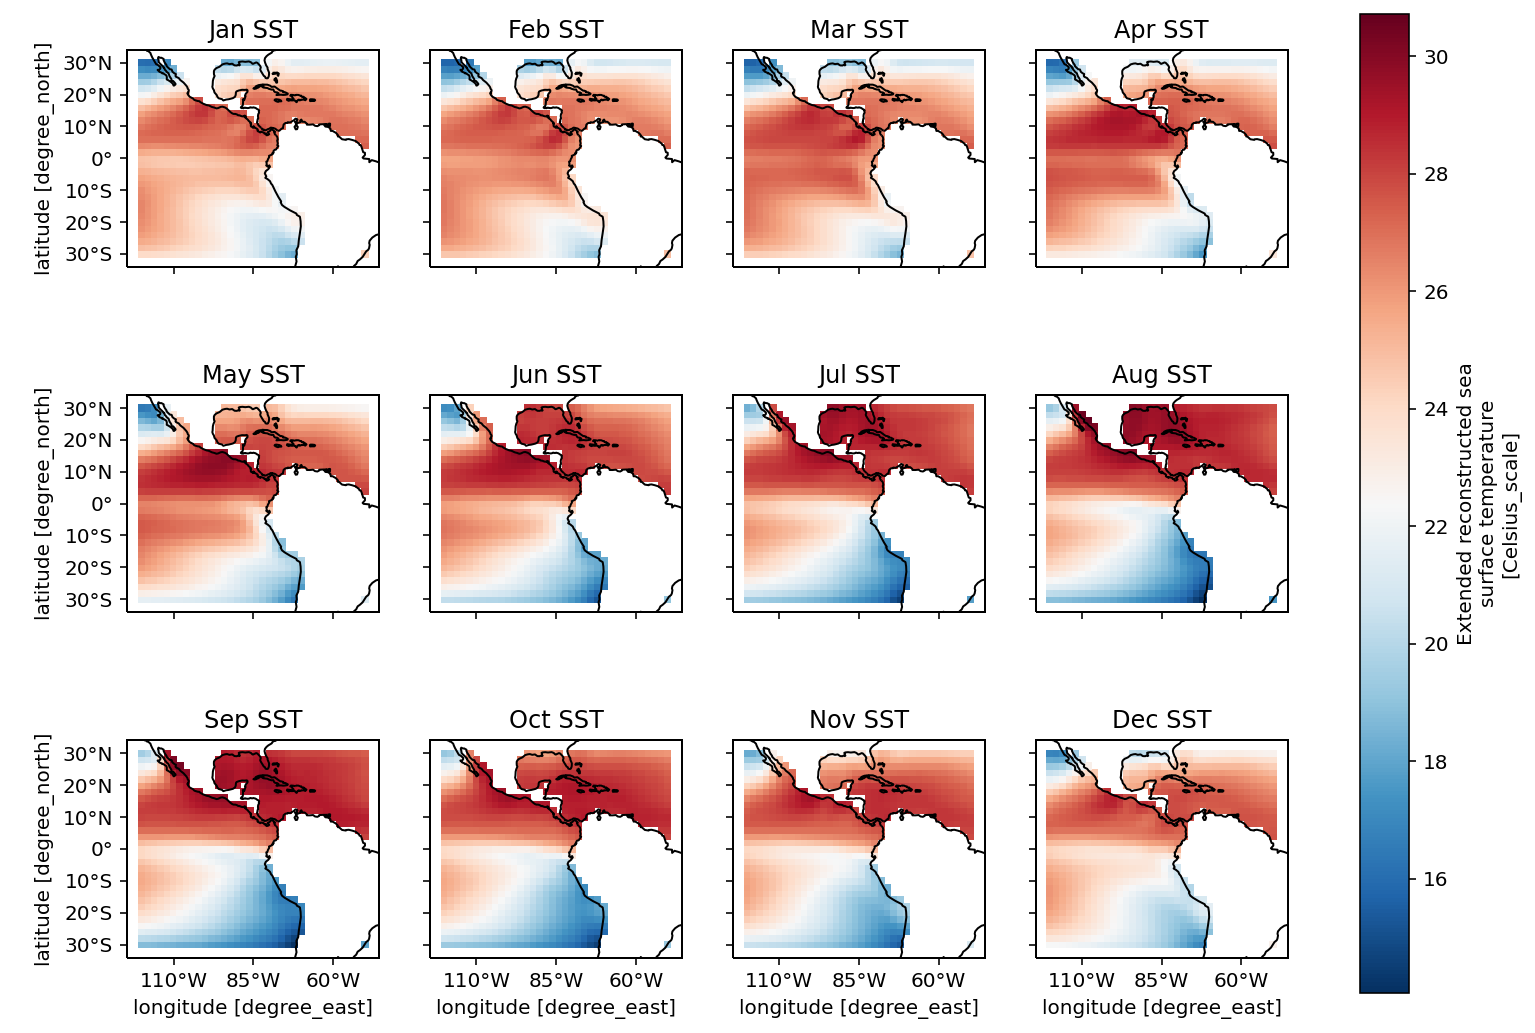

In [63]:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
g = sst_climo_ds.sst.plot.pcolormesh(x='X', y='Y', col='T', col_wrap=4, cmap='RdBu_r', subplot_kws={'projection': ccrs.PlateCarree()}, infer_intervals=True);
for ii, ax in enumerate(g.axes.flat):
    ax.set_title(month_str[ii] + ' SST')
    ax.coastlines()
    ax.set_xticks(np.arange(200,325,25)-360)
    ax.set_yticks(np.arange(-30,30+10,10))
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    #ax.set_xlabel('longitude')
    #ax.set_ylabel('latitude')
    

## Making pcolor plots line up with coasts

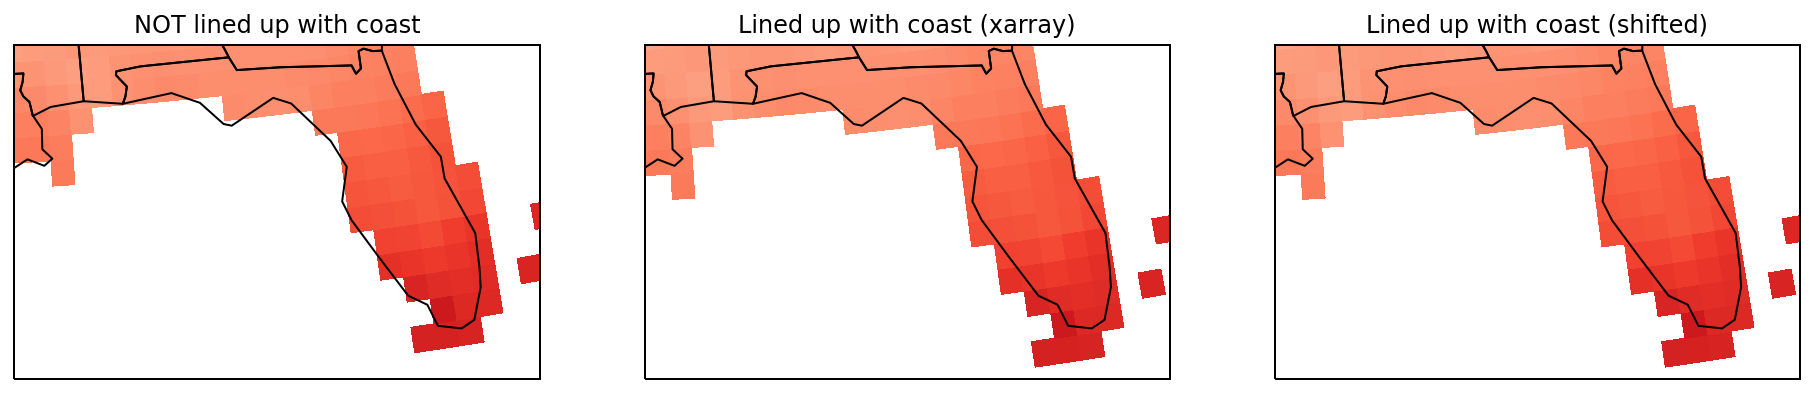

In [50]:
t2m_DJF_url = 'http://iridl.ldeo.columbia.edu/home/.tippett/.scratch/.APMA4990/.t2m_DJF/dods'
t2m_DJF_ds = xr.open_dataset(t2m_DJF_url)
t2m = t2m_DJF_ds.t2m_DJF

proj_map = ccrs.LambertConformal(central_longitude = -95, central_latitude = 45)
proj_dta = ccrs.PlateCarree()  # the data's projection
extent = [-90, -79, 25, 30.5]

fig = plt.figure(figsize = (16, 8))

ax = plt.subplot(1, 3, 1, projection = proj_map)
ax.set_title('NOT lined up with coast')
ax.pcolormesh(t2m.X, t2m.Y, t2m[0], cmap = 'Reds', vmin = 0, transform = proj_dta)
ax.add_feature(cfeature.STATES)
ax.set_extent(extent)

ax = plt.subplot(1, 3, 2, projection = proj_map)
t2m[0].plot(ax = ax, transform = proj_dta, cmap = 'Reds', vmin = 0, add_colorbar = False)
ax.set_title('Lined up with coast (xarray)')
ax.add_feature(cfeature.STATES)
ax.set_extent(extent)

ax = plt.subplot(1, 3, 3, projection = proj_map)
ax.set_title('Lined up with coast (shifted)')
#ax.pcolormesh(t2m.X, t2m.Y, t2m[0], cmap = 'Reds', vmin = 0, transform = proj_dta)
ax.pcolormesh(t2m.X - 0.25, t2m.Y - 0.25, t2m[0], cmap = 'Reds', vmin = 0, transform = proj_dta)
ax.add_feature(cfeature.STATES)
ax.set_extent(extent)

## Quivers

In [68]:
iridl = 'http://iridl.ldeo.columbia.edu/'
period = "T/(Jan%201981)/(Dec%202010)/RANGE/"
tropical_pacific = "Y/-35/35/RANGEEDGES/X/100/300/RANGEEDGES/"
tfix2 = "T//pointwidth/1/def/%28days%20since%201960-01-01%29streamgridunitconvert/"
ERA5_uas_url = iridl + "home/.tippett/.scratch/.ECMWF-IFS-Cy41r2/.ERA5/.mon/.atmos/.uas/monthlyAverage/" + tropical_pacific + period + "yearlyAverage/" + tfix2 + "dods"
ERA5_vas_url = iridl + "home/.tippett/.scratch/.ECMWF-IFS-Cy41r2/.ERA5/.mon/.atmos/.vas/monthlyAverage/" + tropical_pacific + period + "yearlyAverage/" + tfix2 + "dods"

In [103]:
u_ds = xr.open_dataset(ERA5_uas_url)
v_ds = xr.open_dataset(ERA5_vas_url)
u_annual = u_ds.uas.mean(dim = 'T')
v_annual = v_ds.vas.mean(dim = 'T')
X = u_annual.X
Y = u_annual.Y

## Quivers: too fine

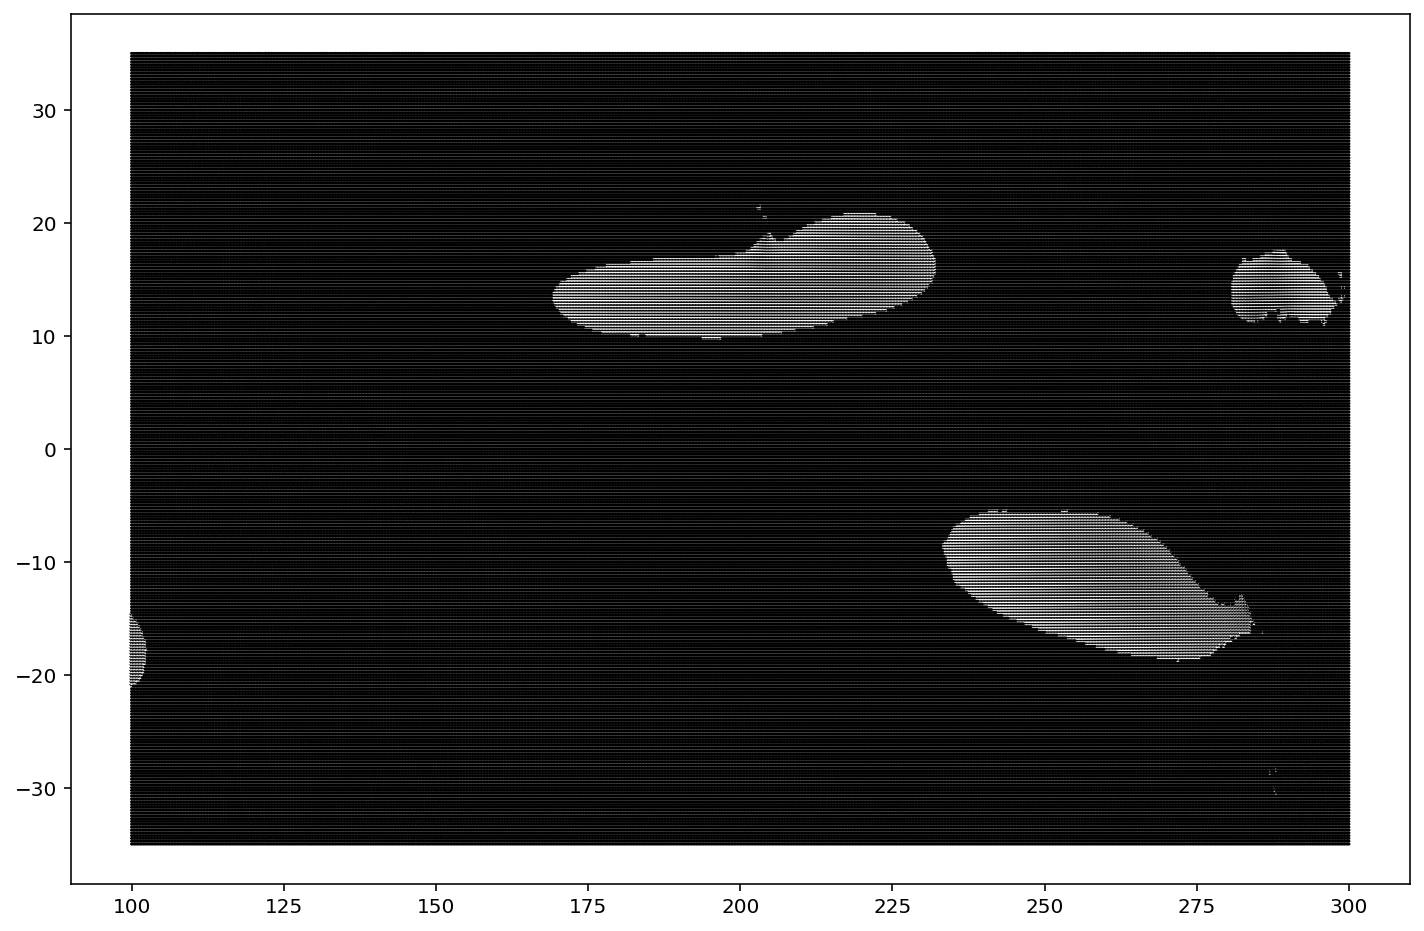

In [104]:
# grid is too fine
fig, ax = plt.subplots(figsize = (12, 8))
plt.quiver(X, Y, u_annual,v_annual);

## Quivers: skip some points

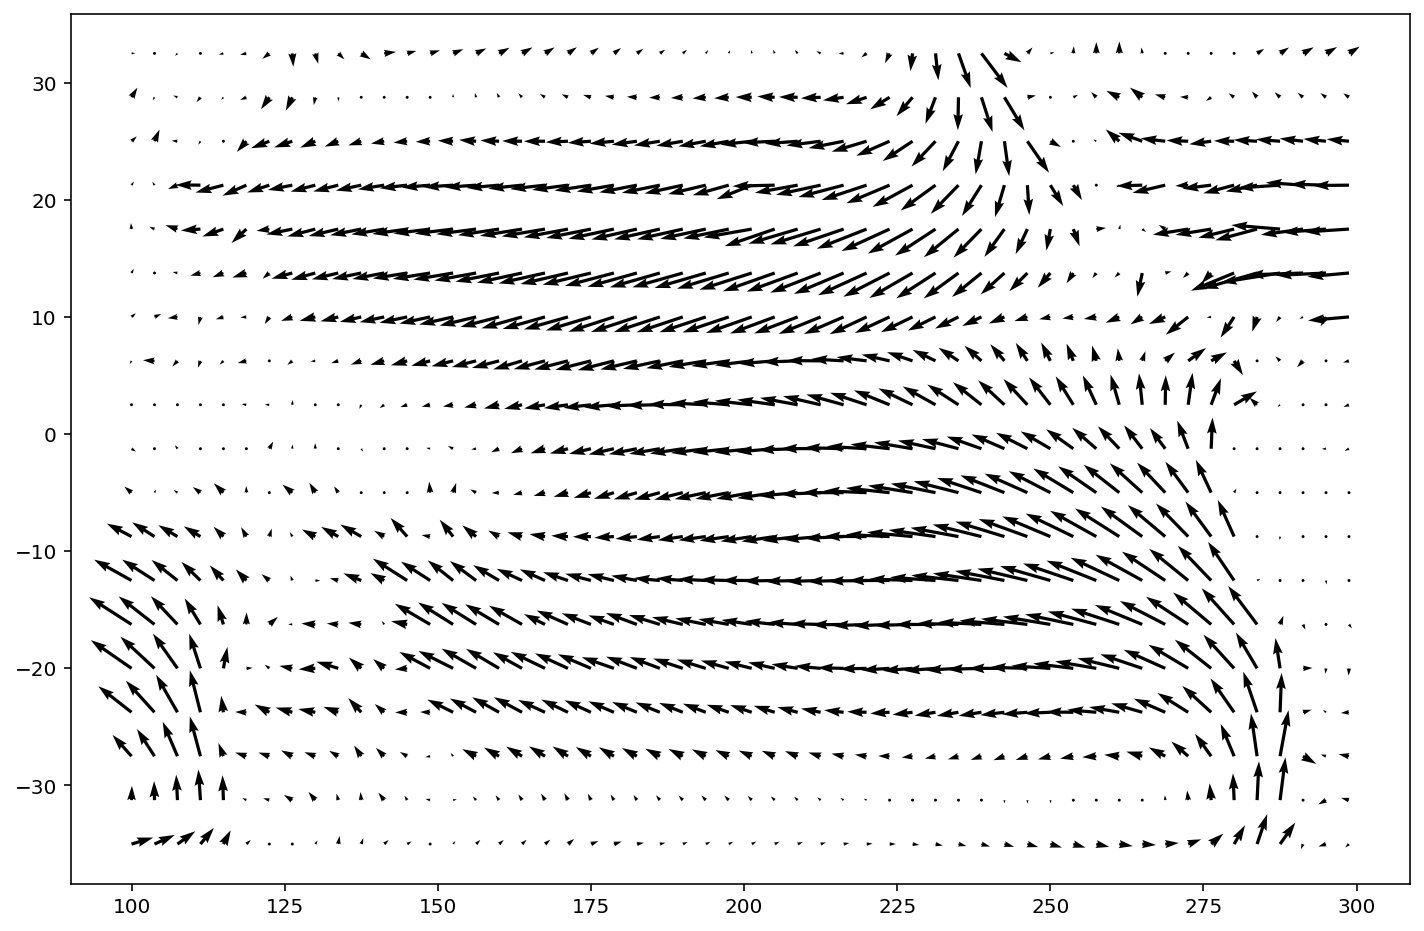

In [105]:
#skip some grid points. Better xarray way?
# note this works with xarray variables
skip = 15
fig, ax = plt.subplots(figsize=(12,8))
plt.quiver(X[::skip], Y[::skip], u_annual[::skip,::skip], v_annual[::skip,::skip]);

TypeError: Argument 'x' has incorrect type (expected numpy.ndarray, got DataArray)

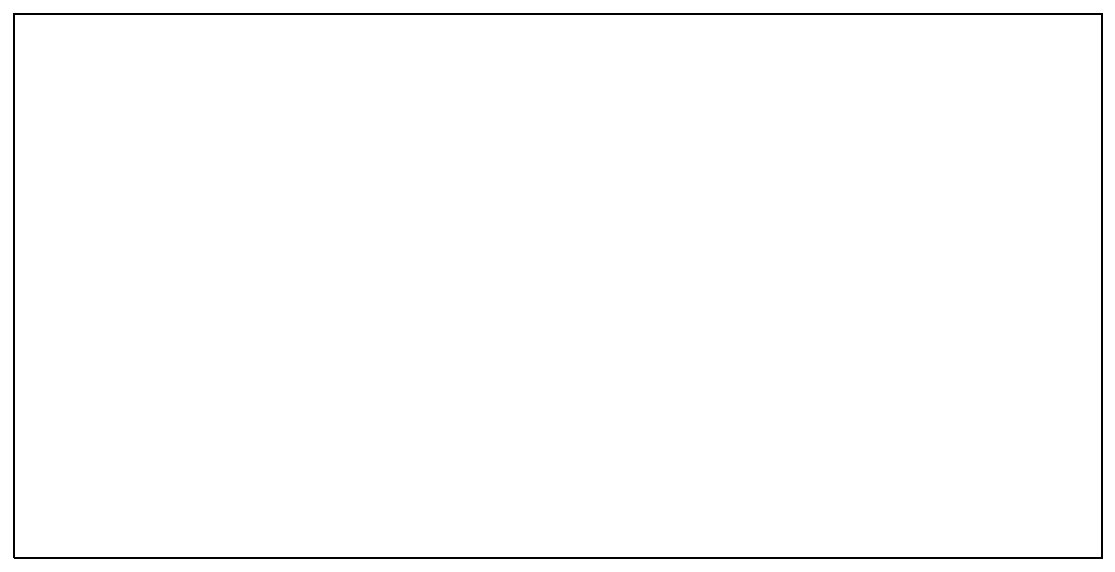

In [110]:
#skip some grid points. 
# note this does not work with xarray variables
skip = 15
proj_map = ccrs.PlateCarree(central_longitude = 180)
proj_dta = ccrs.PlateCarree()

fig = plt.figure(figsize = (15, 5))
ax = plt.axes(projection = proj_map)

plt.quiver(X[::skip], Y[::skip], u_annual[::skip,::skip], v_annual[::skip,::skip], transform = proj_dta);

## Quivers: skip some points and add maps

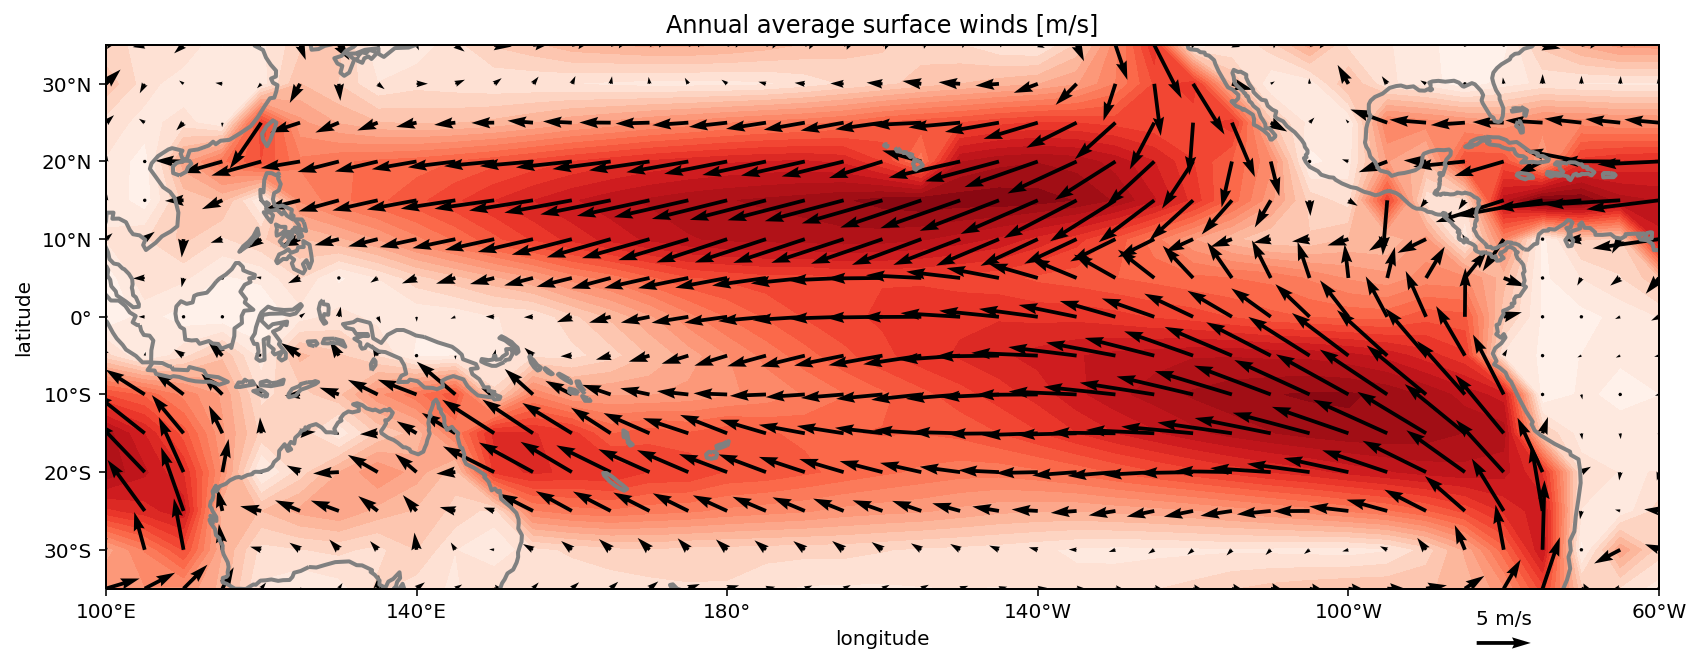

In [117]:
#Without "fix" of shifting by 1/2 grid spacing
skip = 20
proj_map = ccrs.PlateCarree(central_longitude = 180)
proj_dta = ccrs.PlateCarree()

u_plot = u_annual[::skip,::skip].values
v_plot = v_annual[::skip,::skip].values
X_plot = u_ds.X[::skip].values
Y_plot = u_ds.Y[::skip].values

fig = plt.figure(figsize = (15, 5))
ax = plt.axes(projection = proj_map)
ax.contourf(X_plot, Y_plot, np.sqrt(u_plot**2 + v_plot**2), cmap = 'Reds', transform = proj_dta, levels = 20)
q = ax.quiver(X_plot, Y_plot, u_plot, v_plot, transform = proj_dta);
ax.coastlines(color = 'gray', lw = 2);
ax.set_xticks(range(100, 360 - 60 + 40, 40), crs = proj_dta)
ax.set_yticks(range(-30, 30 + 10, 10), crs = proj_dta)
lon_formatter = LongitudeFormatter(zero_direction_label = True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_title('Annual average surface winds [m/s]');
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.quiverkey(q, 0.9, -0.1, 5,label = "5 m/s");
fig.set_facecolor("white");

/Users/tippett/miniconda3/envs/pangeo/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:1400: UserWarning: The following kwargs were not used by contour: 'level'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


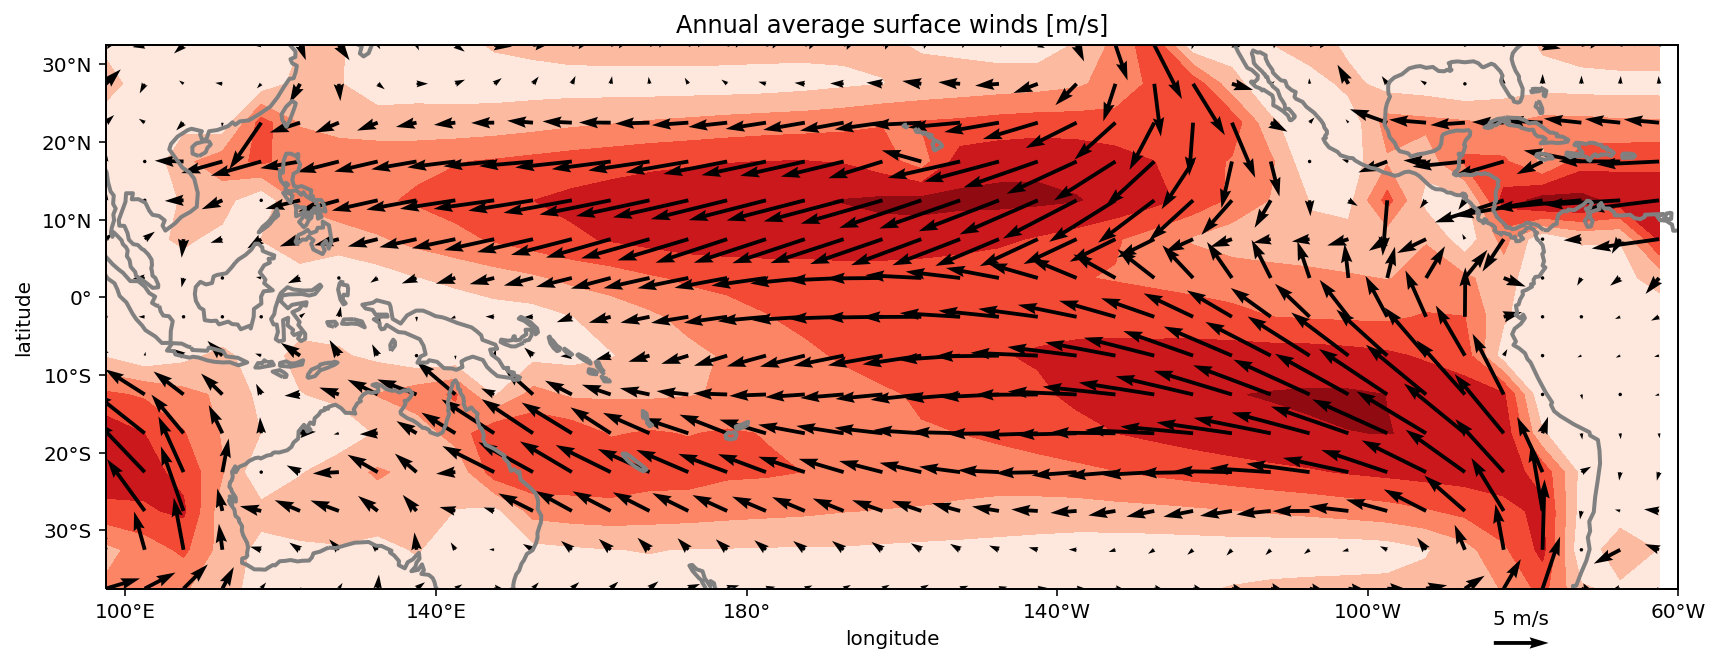

In [116]:
#Without "fix" of shifting by 1/2 grid spacing

skip = 20
proj_map = ccrs.PlateCarree(central_longitude = 180)
proj_dta = ccrs.PlateCarree()

u_plot = u_annual[::skip,::skip].values
v_plot = v_annual[::skip,::skip].values
X_plot = u_ds.X[::skip].values
Y_plot = u_ds.Y[::skip].values

dx = np.abs(X_plot[1] - X_plot[0])
dy = np.abs(Y_plot[1] - Y_plot[0])

fig = plt.figure(figsize = (15, 5))
ax = plt.axes(projection = proj_map)
ax.contourf(X_plot - dx/2, Y_plot - dy/2, np.sqrt(u_plot**2 + v_plot**2), cmap = 'Reds', transform = proj_dta, level = 20)
q = ax.quiver(X_plot - dx/2, Y_plot - dy/2, u_plot, v_plot, transform = proj_dta);
ax.coastlines(color = 'gray', lw = 2);
ax.set_xticks(range(100, 360 - 60 + 40, 40), crs = proj_dta)
ax.set_yticks(range(-30, 30 + 10, 10), crs = proj_dta)
lon_formatter = LongitudeFormatter(zero_direction_label = True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_title('Annual average surface winds [m/s]');
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.quiverkey(q, 0.9, -0.1, 5,label = "5 m/s");
fig.set_facecolor("white");